In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [256]:
pd.set_option('display.max_columns', None)
path = '../../dados/experimentos/chess_games.csv'
df = pd.read_csv(path, nrows=100000)
df.head()

,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN
0,Classical,eisaaaa,HAMID449,1-0,2016.06.30,22:00:01,1901,1896,11.0,-11.0,D10,Slav Defense,300+5,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...
1,Blitz,go4jas,Sergei1973,0-1,2016.06.30,22:00:01,1641,1627,-11.0,12.0,C20,King's Pawn Opening: 2.b3,300+0,Normal,1. e4 e5 2. b3 Nf6 3. Bb2 Nc6 4. Nf3 d6 5. d3 ...
2,Blitz tournament,Evangelistaizac,kafune,1-0,2016.06.30,22:00:02,1647,1688,13.0,-13.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,180+0,Time forfeit,1. e4 d5 2. exd5 Qxd5 3. Nf3 Bg4 4. Be2 Nf6 5....
3,Correspondence,Jvayne,Wsjvayne,1-0,2016.06.30,22:00:02,1706,1317,27.0,-25.0,A00,Van't Kruijs Opening,-,Normal,1. e3 Nf6 2. Bc4 d6 3. e4 e6 4. Nf3 Nxe4 5. Nd...
4,Blitz tournament,kyoday,BrettDale,0-1,2016.06.30,22:00:02,1945,1900,-14.0,13.0,B90,"Sicilian Defense: Najdorf, Lipnitsky Attack",180+0,Time forfeit,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...


In [257]:
# Drop null values in WhiteRatingDiff and BlackRatingDiff
df = df.dropna()


# Transform UTCDate into Year, Month and Day
# Will it be useful with a dataset that only has the year of 2016? Maybe this could be useful to analyse player information over time
df[['Year', 'Month', 'Day']] = df['UTCDate'].str.split('.', expand=True)
df = df.drop('UTCDate', axis=1)

# Transform UTCTime into hour, minute and second
df[['Hour', 'Minute', 'Second']] = df['UTCTime'].str.split(':', expand=True)

# Transform Result into WhiteWon and BlackWon
df['WhiteWon'] = df['Result'].apply(lambda result: 1 if result == '1-0' else (0.5 if result == '1/2-1/2' else 0))
df['BlackWon'] = df['Result'].apply(lambda result: 1 if result == '0-1' else (0.5 if result == '1/2-1/2' else 0))
df = df.drop('Result', axis=1)

# Transform TimeControl into Time and Increment
df = df[df['TimeControl'] != '-']
df[['Time', 'Increment']] = df['TimeControl'].str.split('+', expand=True)
df = df.drop('TimeControl', axis=1)

df['EloDiff'] = df['WhiteElo'] - df['BlackElo']
df['EloAvg'] = (df['WhiteElo'] + df['BlackElo']) / 2

df.head()

,Event,White,Black,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,Termination,AN,Year,Month,Day,Hour,Minute,Second,WhiteWon,BlackWon,Time,Increment,EloDiff,EloAvg
0,Classical,eisaaaa,HAMID449,22:00:01,1901,1896,11.0,-11.0,D10,Slav Defense,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...,2016,06,30,22,00,01,1.0,0.0,300,5,5,1898.5
1,Blitz,go4jas,Sergei1973,22:00:01,1641,1627,-11.0,12.0,C20,King's Pawn Opening: 2.b3,Normal,1. e4 e5 2. b3 Nf6 3. Bb2 Nc6 4. Nf3 d6 5. d3 ...,2016,06,30,22,00,01,0.0,1.0,300,0,14,1634.0
2,Blitz tournament,Evangelistaizac,kafune,22:00:02,1647,1688,13.0,-13.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,Time forfeit,1. e4 d5 2. exd5 Qxd5 3. Nf3 Bg4 4. Be2 Nf6 5....,2016,06,30,22,00,02,1.0,0.0,180,0,-41,1667.5
4,Blitz tournament,kyoday,BrettDale,22:00:02,1945,1900,-14.0,13.0,B90,"Sicilian Defense: Najdorf, Lipnitsky Attack",Time forfeit,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,2016,06,30,22,00,02,0.0,1.0,180,0,45,1922.5
5,Blitz tournament,lucaseixasouza,diguim,22:00:02,1773,1809,-10.0,10.0,C27,Vienna Game,Normal,1. e4 e5 2. Nc3 d6 3. Nf3 h6 4. Bc4 c6 5. b3 Q...,2016,06,30,22,00,02,0.0,1.0,180,0,-36,1791.0


In [258]:
print(f'{df.WhiteElo.describe()}\n')
print(f'{df.BlackElo.describe()}\n')
print(f'{df.WhiteRatingDiff.describe()}\n')
print(f'{df.BlackRatingDiff.describe()}\n')

count    99570.000000
mean      1738.210806
std        264.225557
min        799.000000
25%       1557.000000
50%       1738.000000
75%       1915.000000
max       2737.000000
Name: WhiteElo, dtype: float64

count    99570.000000
mean      1736.180004
std        265.752127
min        738.000000
25%       1555.000000
50%       1735.000000
75%       1914.000000
max       2731.000000
Name: BlackElo, dtype: float64

count    99570.000000
mean         0.628814
std         22.301258
min       -537.000000
25%         -9.000000
50%          1.000000
75%         10.000000
max        638.000000
Name: WhiteRatingDiff, dtype: float64

count    99570.000000
mean        -0.199769
std         22.100927
min       -570.000000
25%        -10.000000
50%         -1.000000
75%          9.000000
max        644.000000
Name: BlackRatingDiff, dtype: float64



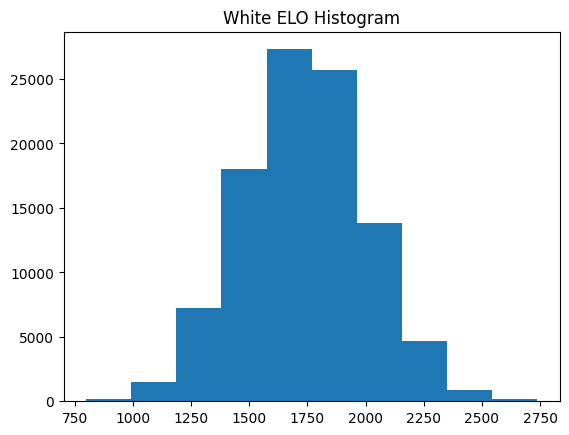

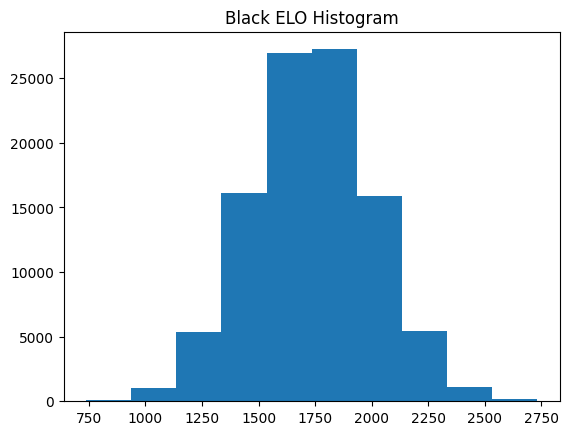

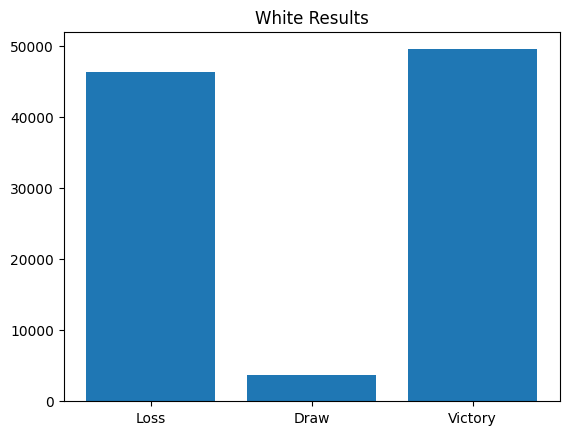

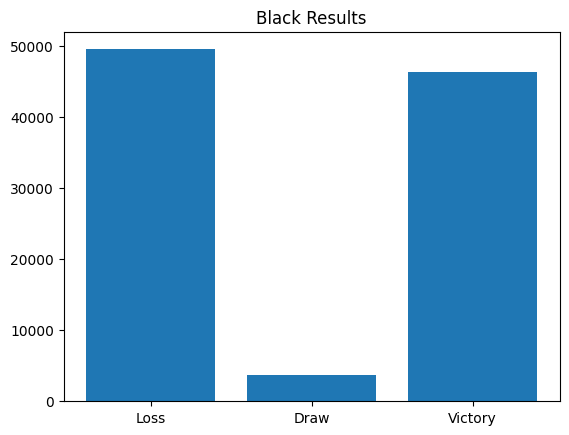

In [259]:
plt.hist(df['WhiteElo'])
plt.title('White ELO Histogram')
plt.show()

plt.hist(df['BlackElo'])
plt.title('Black ELO Histogram')
plt.show()

plt.bar(['Loss', 'Draw', 'Victory'], df['WhiteWon'].value_counts().sort_index())
plt.title('White Results')
plt.show()

plt.bar(['Loss', 'Draw', 'Victory'], df['BlackWon'].value_counts().sort_index())
plt.title('Black Results')
plt.show()


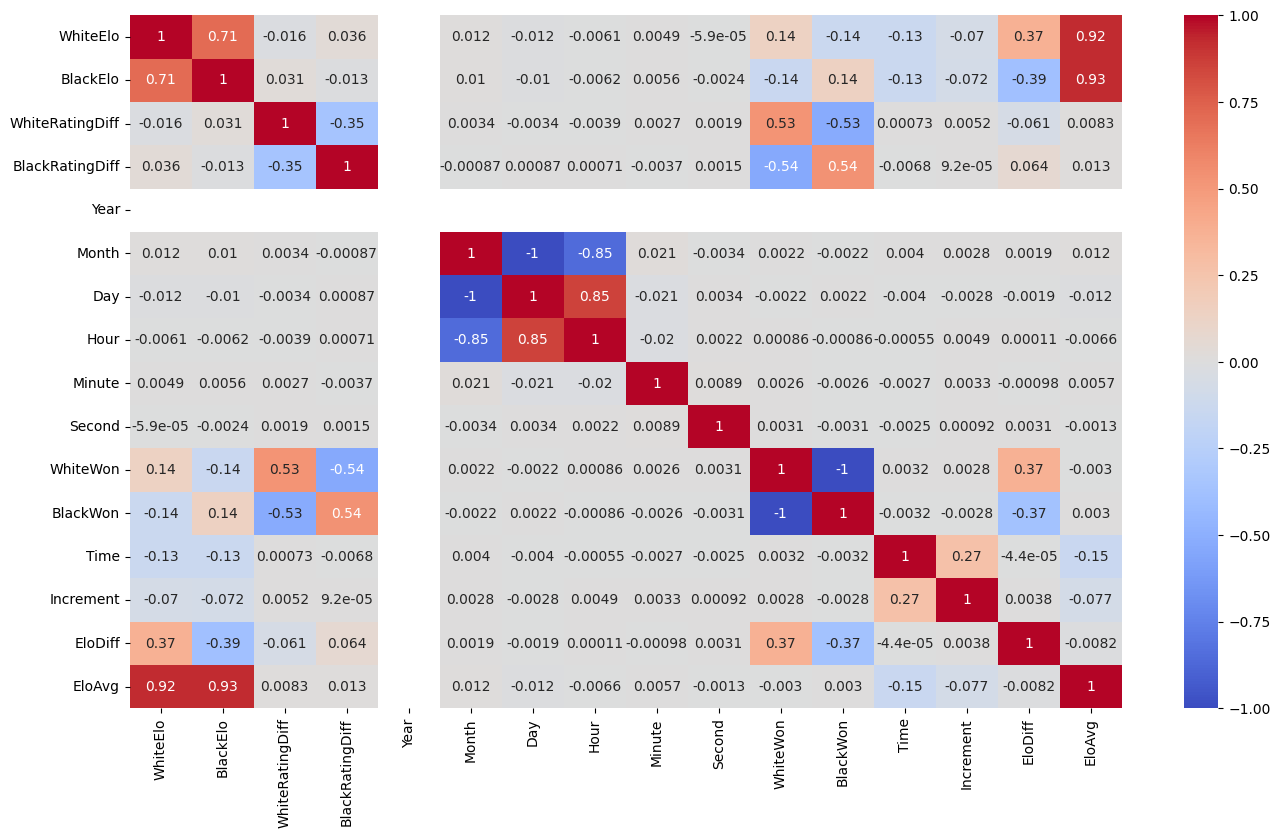

In [260]:
numerical_df = df[['WhiteElo', 'BlackElo', 'WhiteRatingDiff', 'BlackRatingDiff', 'Year', 'Month', 'Day', 'Hour', 
                   'Minute', 'Second', 'WhiteWon', 'BlackWon', 'Time', 'Increment', 'EloDiff', 'EloAvg']]
plt.figure(figsize=(16, 9))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
bins = [0, 1000, 1500, 1750, 2000, float('inf')]
labels = ['0-1000', '1000-1500', '1500-1750', '1750-2000', '>2000']
df['RatingRange'] = pd.cut(df['RatingAvg'], bins=bins, labels=labels)
